In [62]:
import sys
print(sys.executable)


d:\Anaconda\envs\faceid\python.exe


In [63]:
!pip install matplotlib

In [64]:
import cv2

In [65]:
import tensorflow as tf
print(tf.__version__)       # should print 2.15.0

2.15.0


In [66]:
from deepface import DeepFace

In [67]:
img = cv2.imread('happy.jpeg')

In [68]:
import matplotlib.pyplot as plt

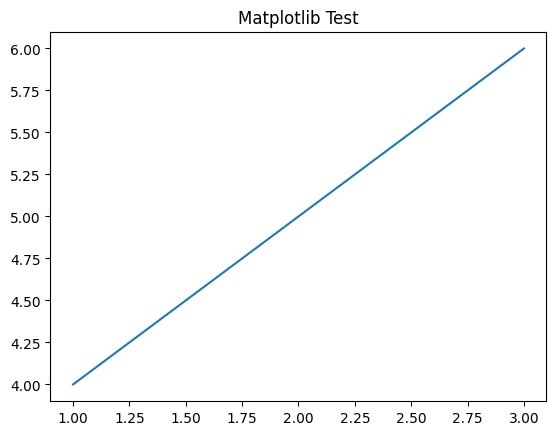

In [69]:
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Matplotlib Test")
plt.show()

In [70]:
result = DeepFace.analyze(img_path="happy.jpeg", actions=["emotion"])
print(result)

[{'emotion': {'angry': 3.1134838707203016e-06, 'disgust': 9.720970695070719e-08, 'fear': 0.009715155465528369, 'happy': 99.97887015342712, 'sad': 0.00014060058219911298, 'surprise': 2.586596394849039e-05, 'neutral': 0.011249911767663434}, 'dominant_emotion': 'happy', 'region': {'x': 103, 'y': 24, 'w': 51, 'h': 51, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.93}]


In [71]:
# Start webcam (0 = default camera)
cap = cv2.VideoCapture(0)

# Test if webcam opens
if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam is ready ✅")


Webcam is ready ✅


In [72]:
while True:
    ret, frame = cap.read()
    if not ret:
        breakq

    try:
        # Analyze the current frame for emotion
        result = DeepFace.analyze(frame, actions=["emotion"], enforce_detection=False)

        # Extract dominant emotion
        dominant_emotion = result[0]['dominant_emotion']

        # Show emotion text on frame
        cv2.putText(frame, dominant_emotion, (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    except Exception as e:
        print("Error:", e)

    # Show the frame
    cv2.imshow("Real-time Emotion Detection", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


In [73]:
cap.release()
cv2.destroyAllWindows()
